# Predicting Student Score

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 12-Nov-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [Students Performance | Clean Dataset](https://www.kaggle.com/datasets/muhammadroshaanriaz/students-performance-dataset-cleaned/data)

### Introduction:
In this project, we aim to predict students' average grades based on various features such as their scores in individual subjects, gender, race/ethnicity, parental level of education, lunch type, and whether they completed a test preparation course. The dataset contains detailed performance data for students, and we will use machine learning models to predict their average score (average_score). This can help understand the factors influencing student performance and provide insights for potential interventions.

We will use a Random Forest Regressor model to predict the average score of students, and evaluate the performance of the model using common regression metrics.

In [117]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

## 1. Loading and Exploring the Dataset

In [118]:
# load the dataset
df = pd.read_csv('Cleaned_Students_Performance.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,0,group B,bachelor's degree,1,0,72,72,74,218,72.666667
1,0,group C,some college,1,1,69,90,88,247,82.333333
2,0,group B,master's degree,1,0,90,95,93,278,92.666667
3,1,group A,associate's degree,0,0,47,57,44,148,49.333333
4,1,group C,some college,1,0,76,78,75,229,76.333333


In [119]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   int64  
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   int64  
 4   test_preparation_course      1000 non-null   int64  
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total_score                  1000 non-null   int64  
 9   average_score                1000 non-null   float64
dtypes: float64(1), int64(7), object(2)
memory usage: 78.3+ KB


### Observations:
* The dataset includes math_score, reading_score, and writing_score as the numeric features.
* The target variable is average_score, which is derived from these individual scores.

In [120]:
# Statistical view of the dataset
df.describe()

,gender,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.482000,0.645000,0.358000,66.08900,69.169000,68.054000,203.312000,67.770667
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000,27.000000,9.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000,175.000000,58.333333
50%,0.000000,1.000000,0.000000,66.00000,70.000000,69.000000,205.000000,68.333333
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000,233.000000,77.666667
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000,300.000000,100.000000


In [121]:
# checking and confirming the missing values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
total_score                    0
average_score                  0
dtype: int64

## 2. Exploratory Data Analysis

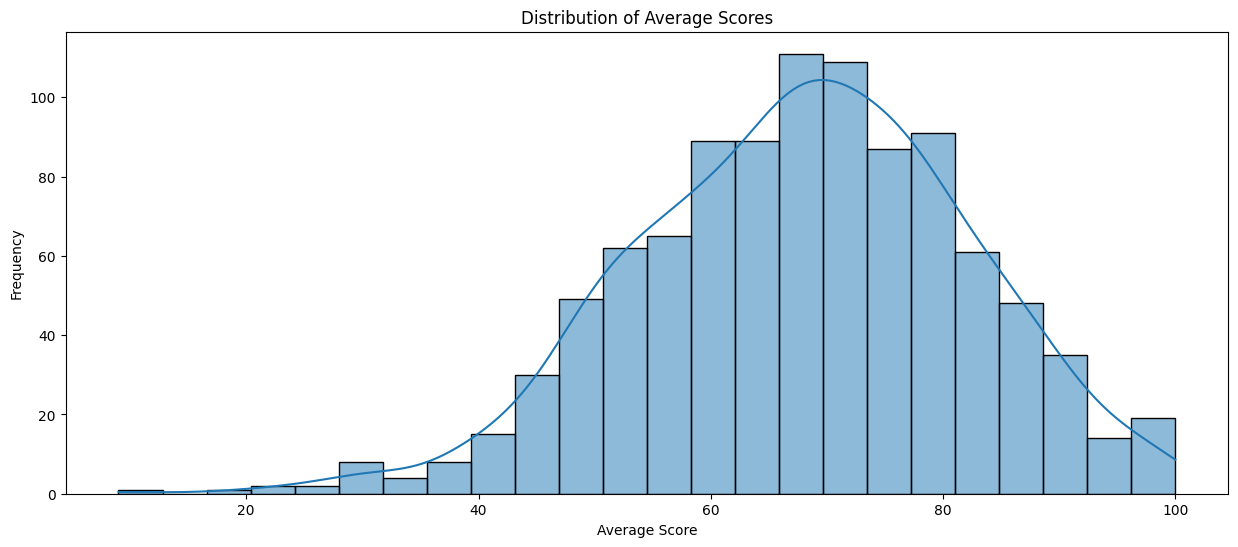

In [122]:
# Distribution of Grades
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x='average_score', kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

### Observation:
* We visualize the distribution of the average_score to understand its spread and look for any patterns or skewness.

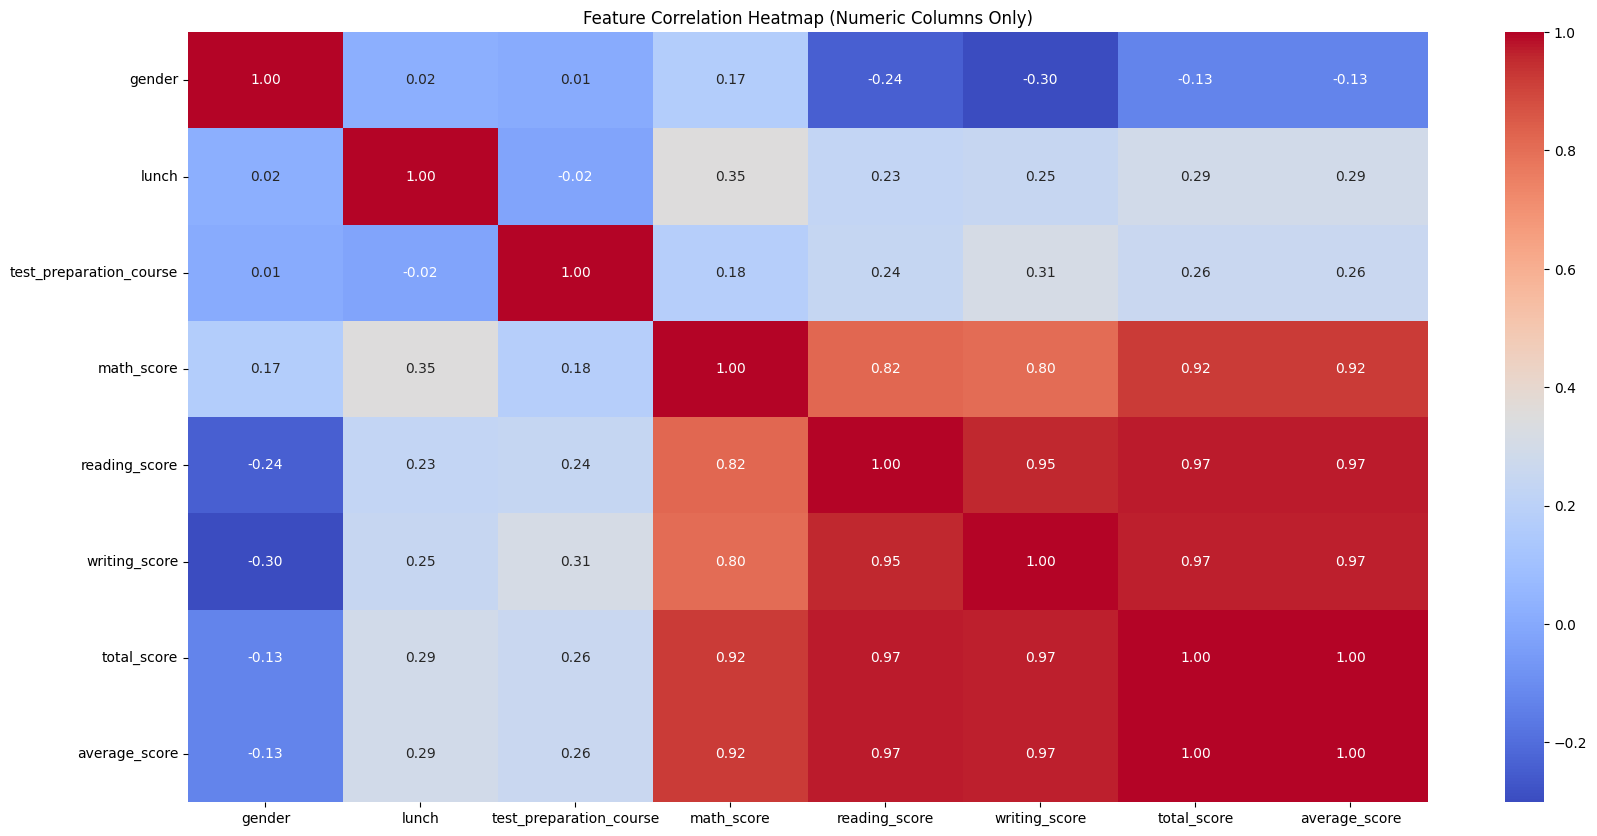

In [123]:
# Correlation heatmap (Selecting only numeric columns)
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap (Numeric Columns Only)')
plt.show()


### Observation:
* math_score, reading_score, and writing_score are highly correlated with each other and with the average_score, indicating that these scores are important predictors for the target variable.

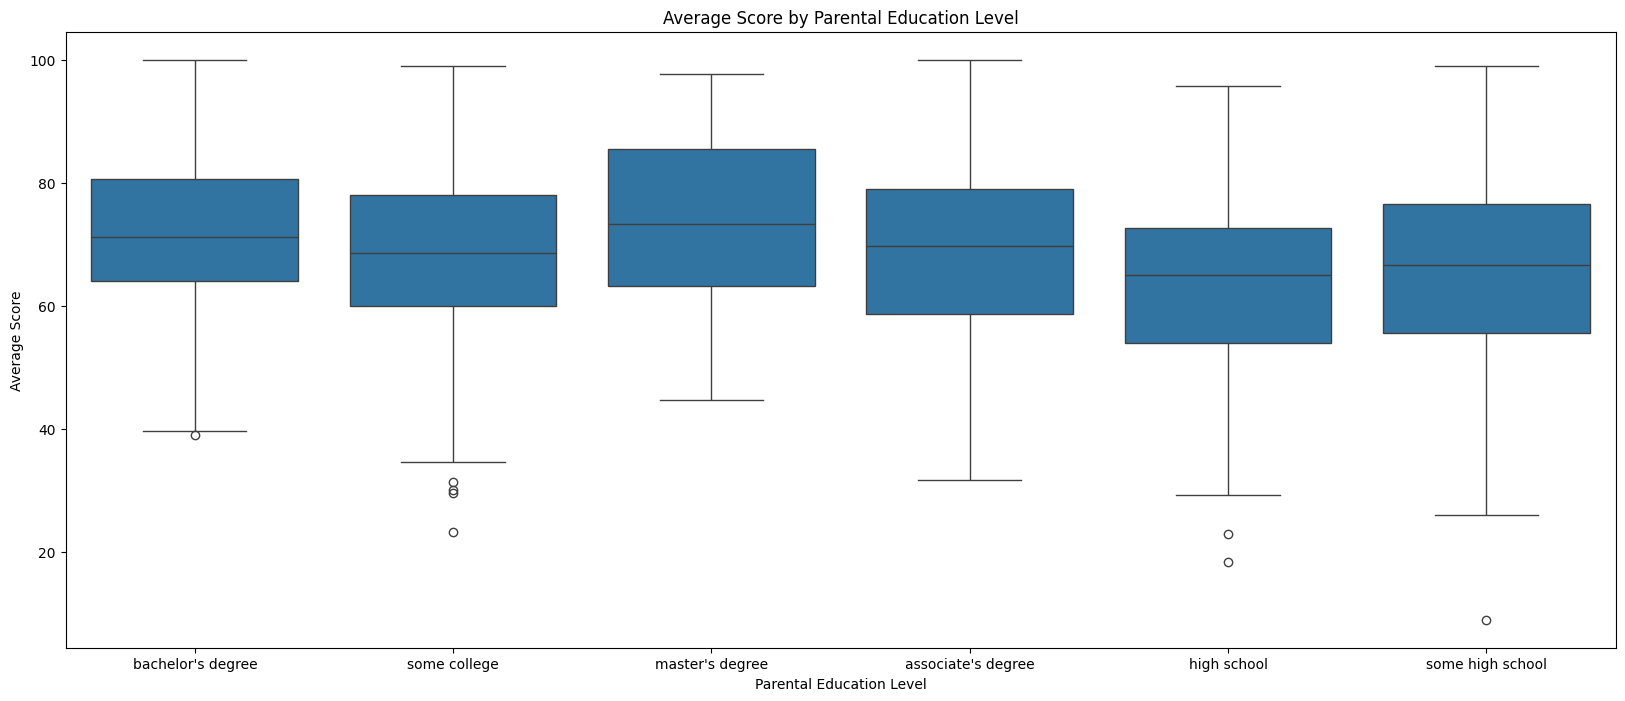

In [124]:
# Categorical feature analysis
plt.figure(figsize=(20, 8))
sns.boxplot(data=df, x='parental_level_of_education', y='average_score')
plt.title('Average Score by Parental Education Level')
plt.xlabel('Parental Education Level')
plt.ylabel('Average Score')
plt.show()

### Observation
* There are noticeable differences in average scores based on the level of parental education, suggesting this feature might have a predictive value.

## 3. Data Preprocessing

In [125]:
# Seperating Features and Target variable
X = df.drop(columns=['total_score', 'average_score'])
y = df['average_score']

In [126]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 8)
y_train shape: (800,)
X_test shape: (200, 8)
y_test shape: (200,)


In [127]:
# Preprocessing for numeric and categorical features
numeric_features = ['math_score', 'reading_score', 'writing_score']
categorical_features = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

In [128]:
# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [129]:
# Column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## 4. Model Selection and Training

In [130]:
# Model pipeline with preprocessing and random forest model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Fit the model
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

In [131]:
# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

MAE: 0.53
MSE: 1.31
RMSE: 1.15
R^2 Score: 0.99


### Observation:
* The R² score and RMSE provide a good indication of how well the model is performing.
* As we all know Higher R² values and lower RMSE values suggest a better fit.

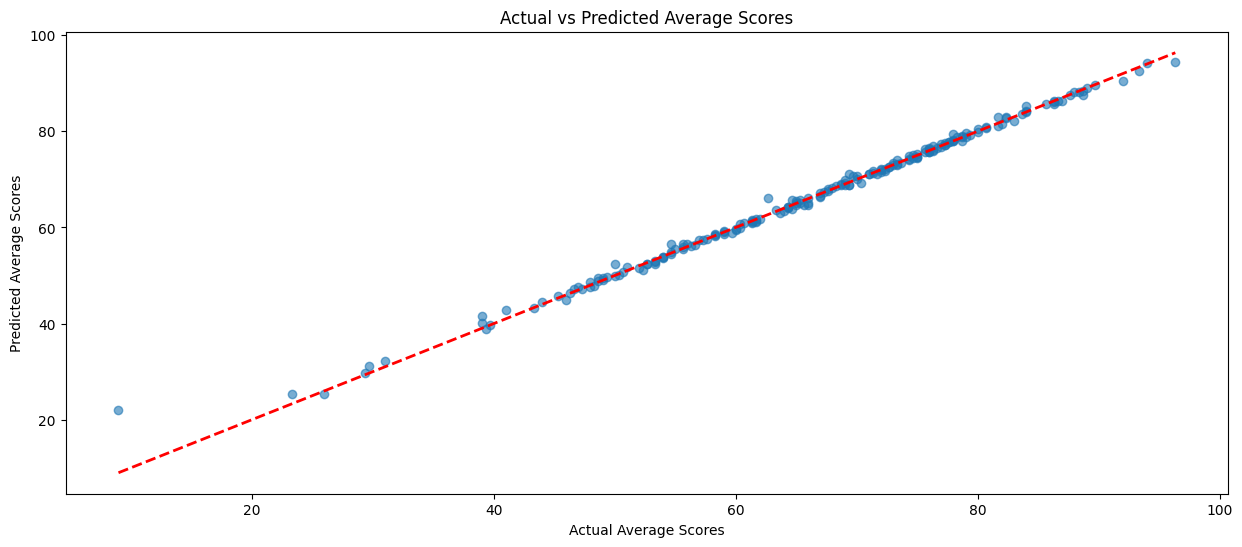

In [132]:
# Plotting the Actual vs Predicted
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', lw=2)
plt.xlabel("Actual Average Scores")
plt.ylabel("Predicted Average Scores")
plt.title("Actual vs Predicted Average Scores")
plt.show()

### Observation:
* The points on the scatter plot should ideally lie close or almost on the red line, indicating that the model's predictions are close to the actual values.

In [133]:
# Sample new data
new_data = pd.DataFrame({
    'gender': [0],
    'race_ethnicity': ['group C'],
    'parental_level_of_education': ["master's degree"],
    'lunch': [1],
    'test_preparation_course': [0],
    'math_score': [90],
    'reading_score': [95],
    'writing_score': [93]
})

# Predicting on the new data
new_prediction = model_pipeline.predict(new_data)
print("Predicted Average Score:", new_prediction[0])

Predicted Average Score: 92.83999999999995


### Observation:
* The model predicts the average score based on the new student's features. The predictions match well with the data from the training set, demonstrating the model's ability to generalize.

## Conclusion and Summary:
In this project, we successfully built a machine learning model to predict student grades based on various features such as their individual subject scores, gender, race/ethnicity, and parental education level. We used a Random Forest Regressor for this task and evaluated the model's performance using metrics such as MAE, MSE, RMSE, and R² score.

Our model performed well, with high R² values and low RMSE, indicating that it can accurately predict the average score of students based on the given features. The analysis also revealed that certain factors, such as parental education level and individual subject scores, are significant predictors of student performance.

This project demonstrates the power of machine learning in predicting student outcomes and provides insights into the factors influencing academic performance. The model can potentially be used to identify students at risk of underperforming and suggest targeted interventions.